In [ ]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign_holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv')

In [ ]:
campaign.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

In [ ]:
print(campaign.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


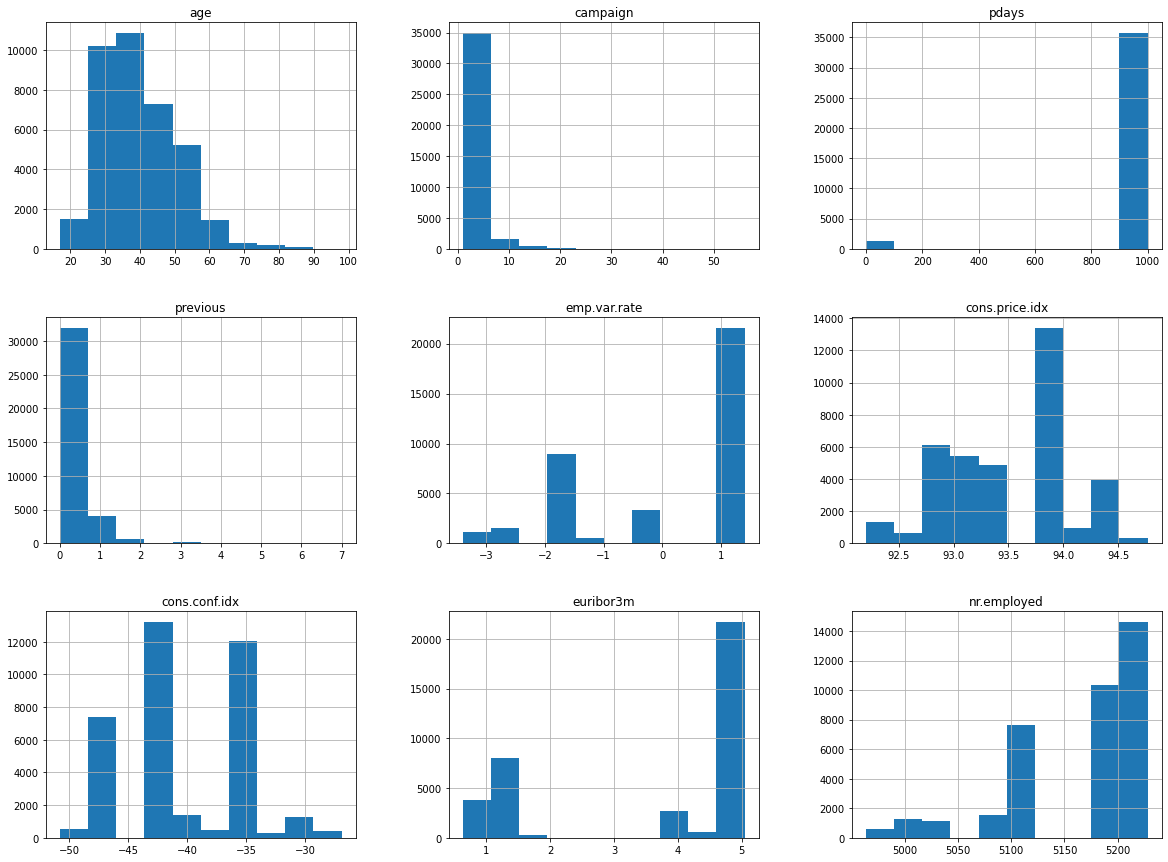

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# This cell contains a histogram plot for our numeric features 

campaign.hist(bins=10, figsize=(20,15))
plt.show()

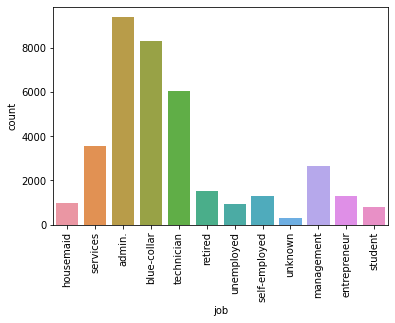

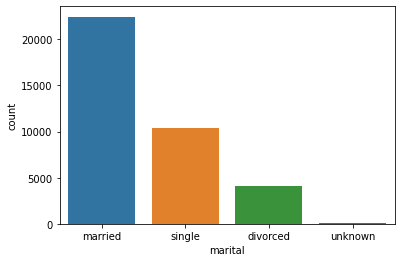

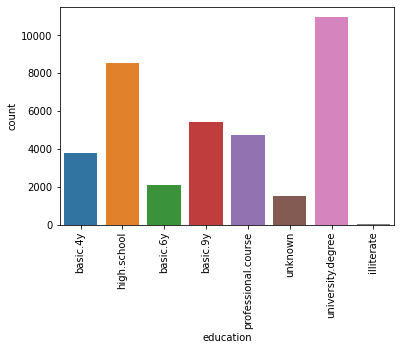

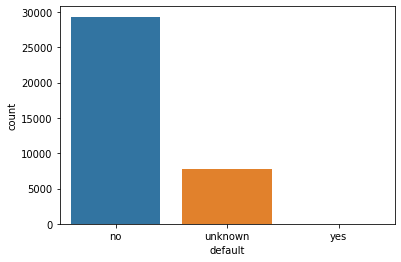

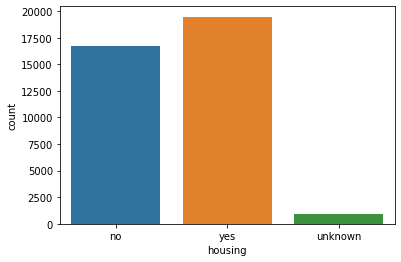

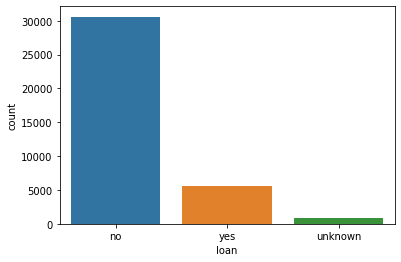

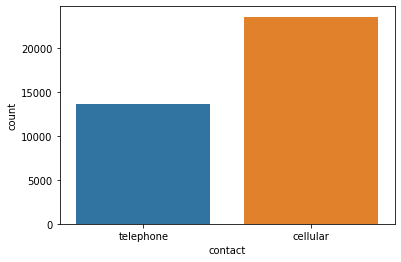

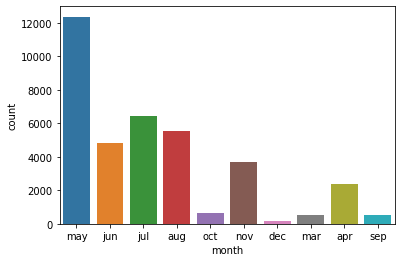

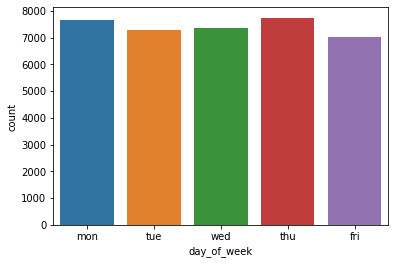

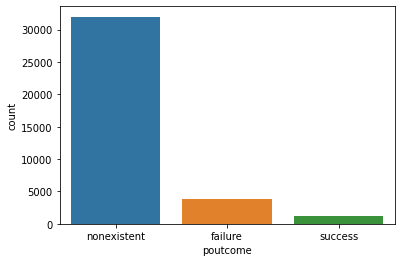

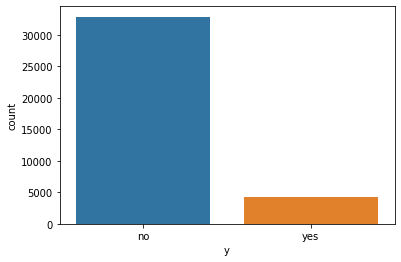

In [ ]:
# This cell contains a bar plot for our categorical data

cat_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]
for col in cat_cols:
    sns.countplot(x=col, data=campaign)
    if col == 'job' or col =='education':
        plt.xticks(rotation=90)
    plt.show()


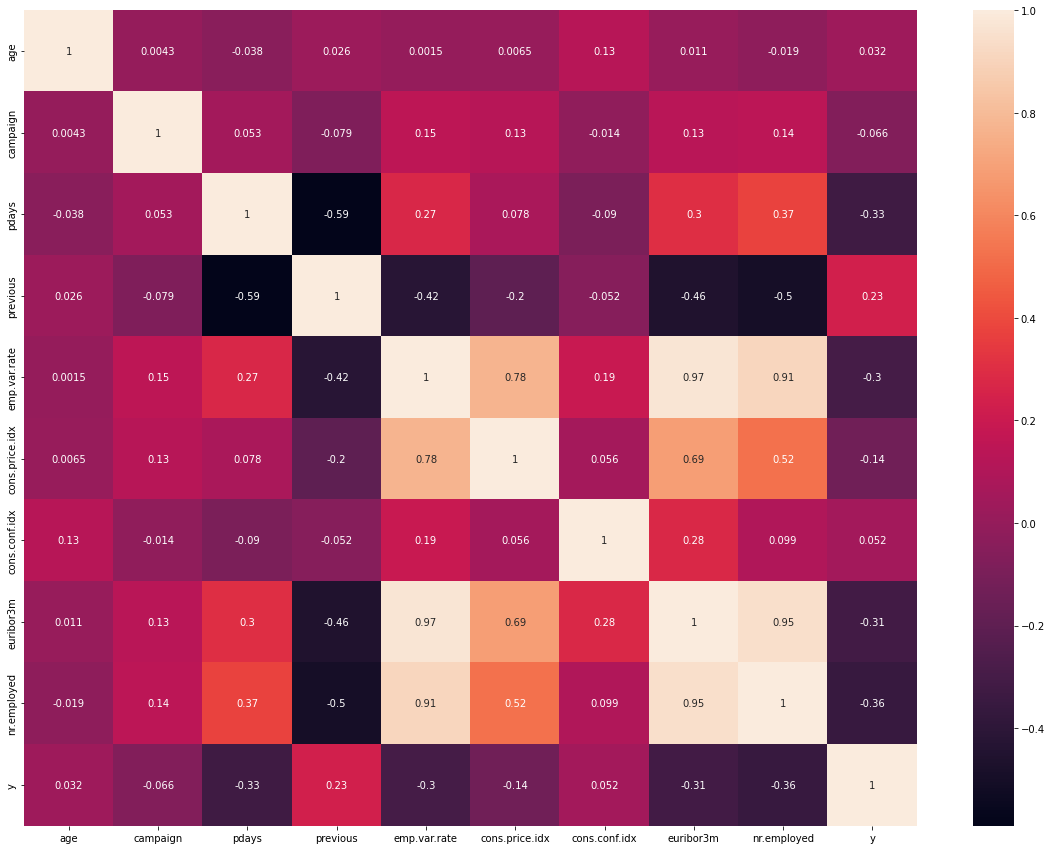

In [ ]:
# This cell contains a Heat Map to check the correleation 


campaign['y'] = pd.get_dummies(campaign['y'], drop_first=True)
plt.figure(figsize=(20,15))
corr = campaign.corr()
sns.heatmap(corr, annot=True)
plt.show()

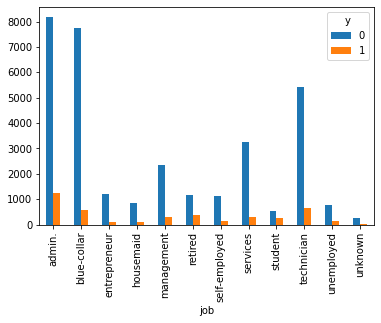

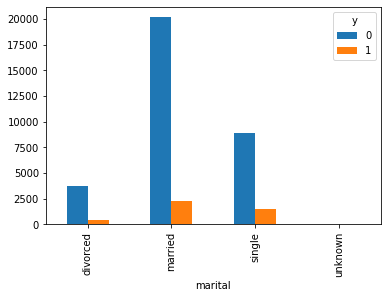

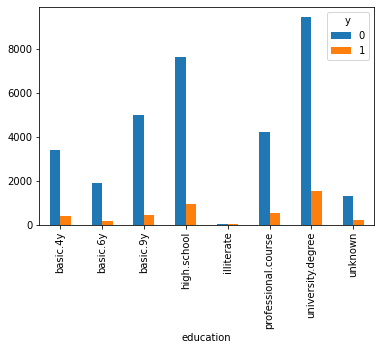

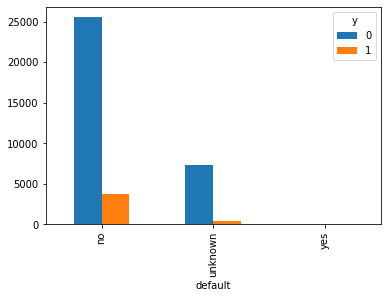

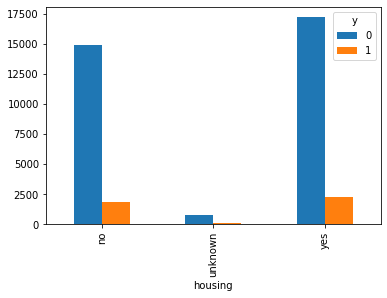

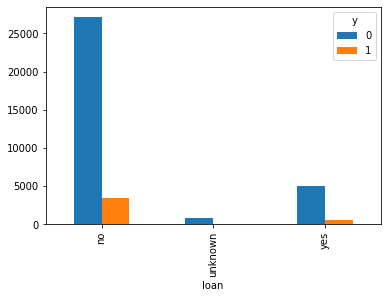

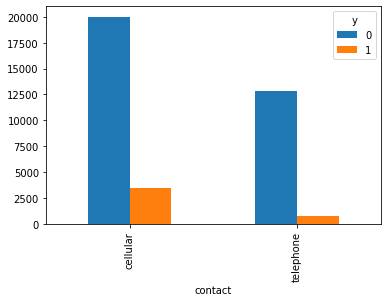

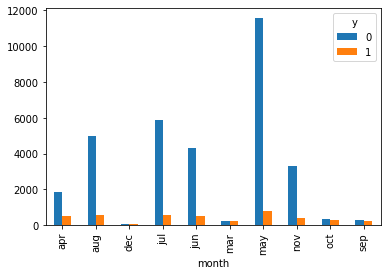

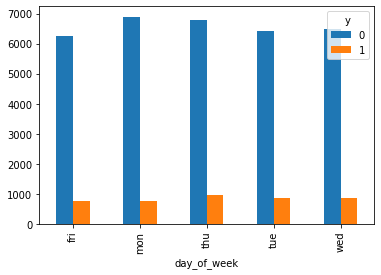

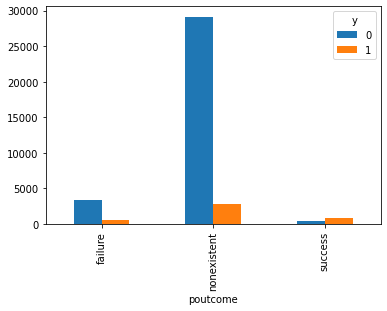

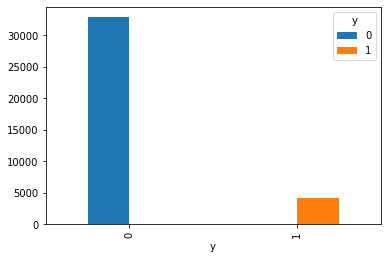

In [ ]:
# This cell contains a Bar Chart to check the correlation for categorical features


crosstab_cats= []
for col in cat_cols:
    crosstab = pd.crosstab(campaign[col], campaign["y"])
    crosstab_cats.append(crosstab)

# Plot the crosstabs
for crosstab in crosstab_cats:
    crosstab.plot(kind="bar")
    plt.show()


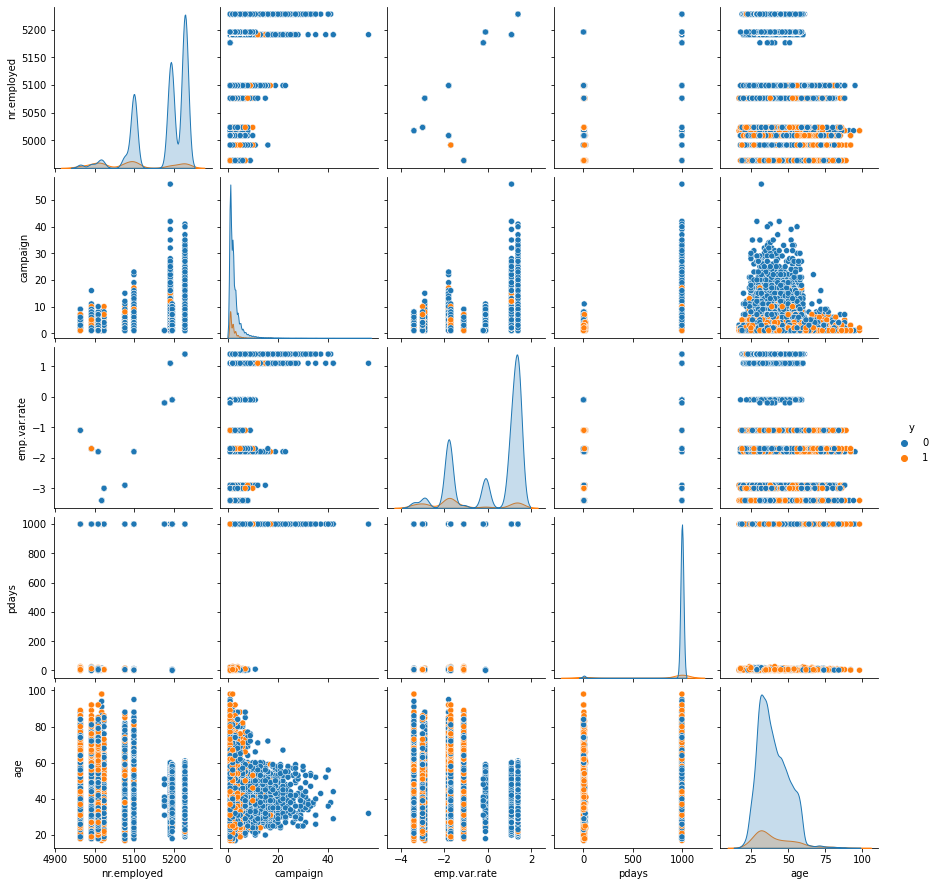

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

cam2 = campaign.filter(['nr.employed', 'campaign', 'emp.var.rate', 'pdays', "y", 'age'])
pairs = sns.pairplot(cam2, hue = "y")
pairs

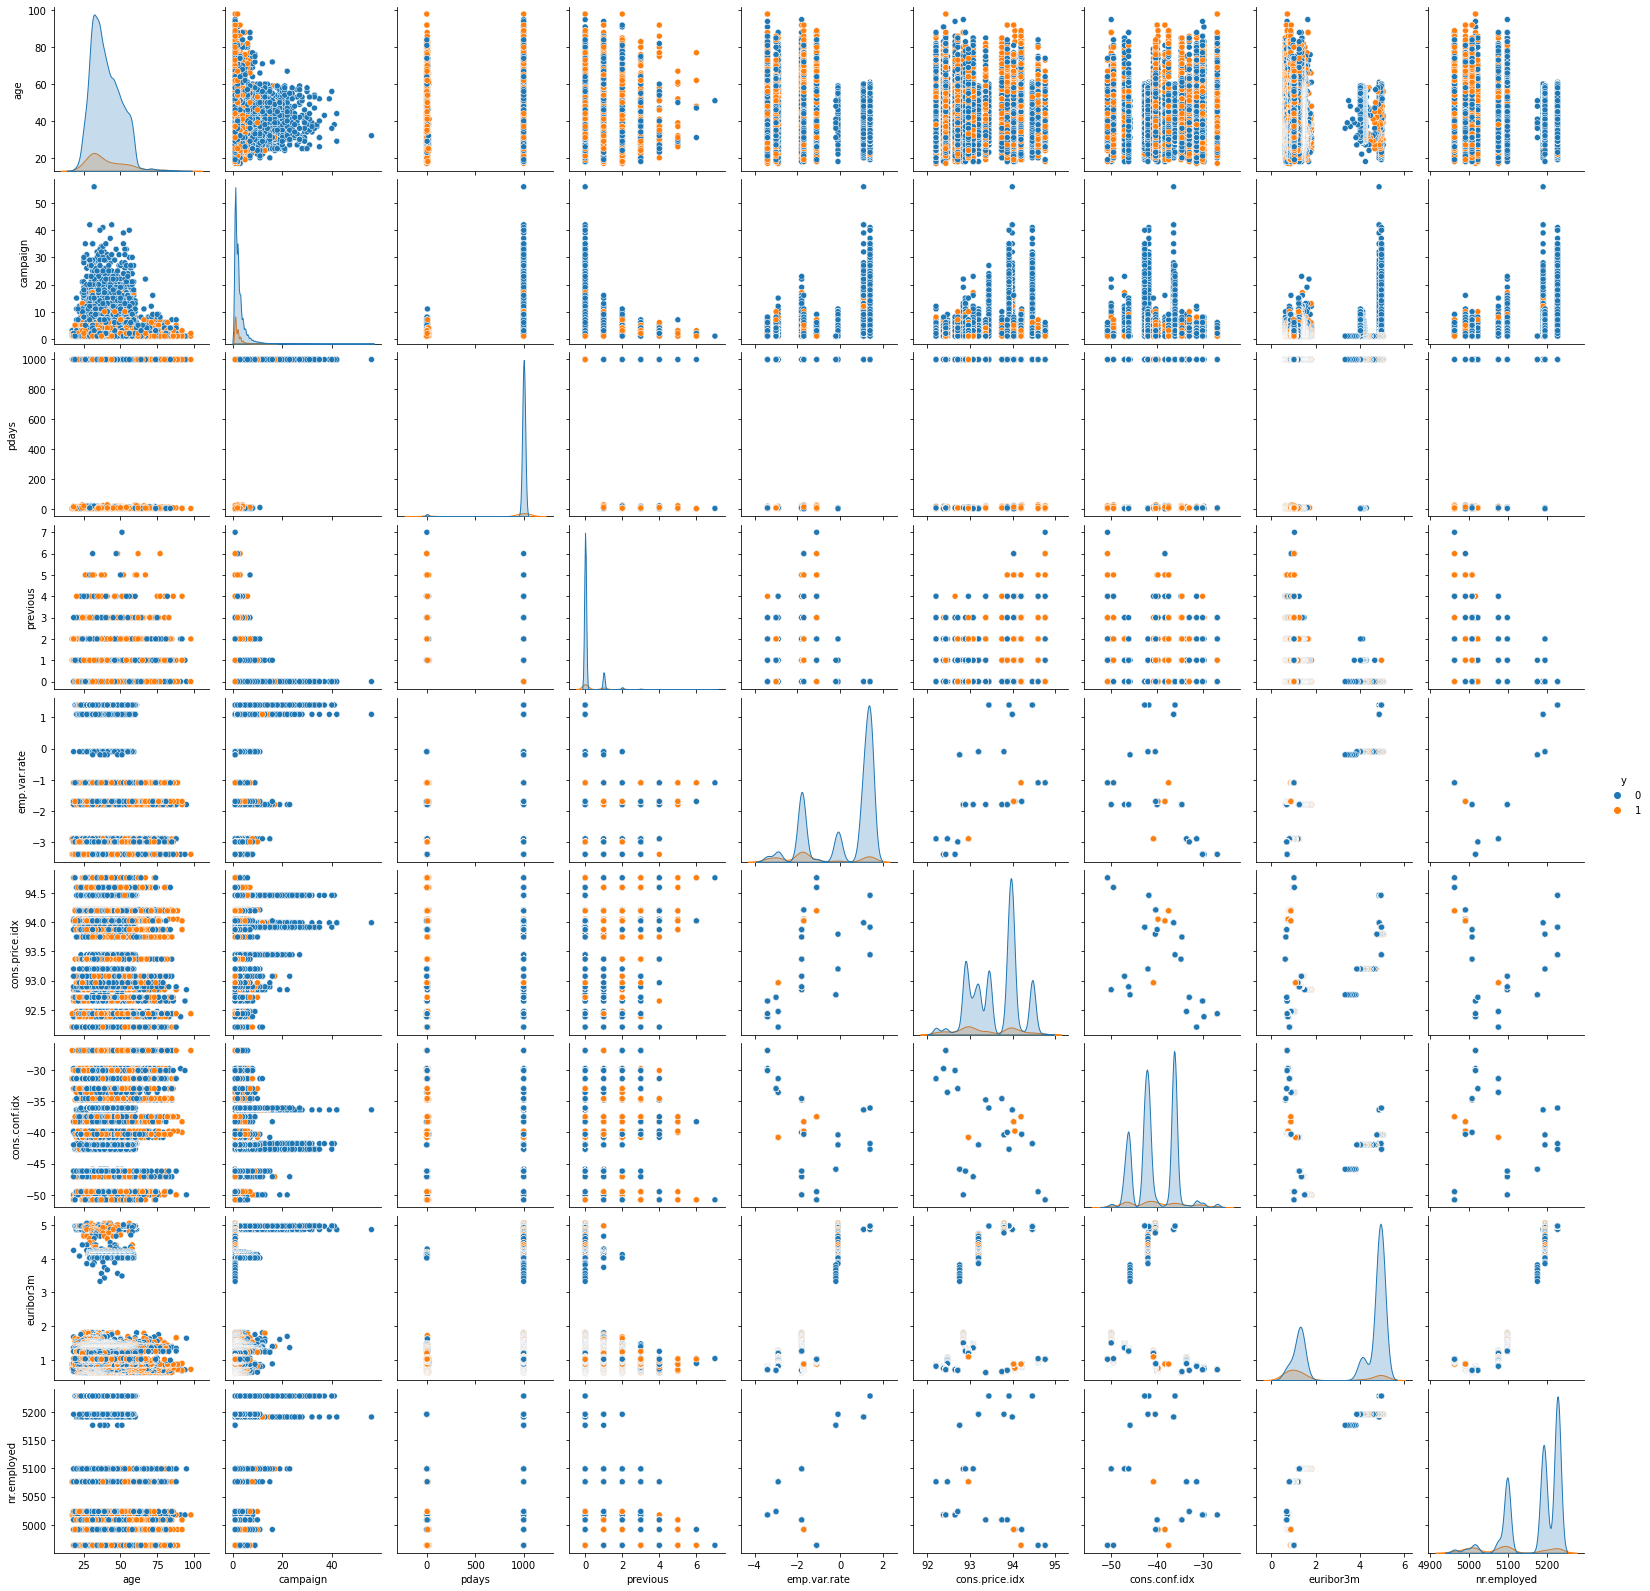

In [ ]:

pairs1 = sns.pairplot(campaign, hue = "y")
pairs1

In [ ]:
campaign['Pdays'] = campaign['pdays'].astype('category')

features = ['nr.employed', 'emp.var.rate', 'pdays', 'previous', 'age', 'campaign']
X = pd.get_dummies(campaign[features], drop_first=True)

campaign['y'] = campaign['y'].astype('category')
campaign['y_encoded'] = campaign['y'].cat.codes

y = campaign['y_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

cam = DecisionTreeClassifier(max_depth= 3)

cam.fit(X_train, y_train)

cam.score(X_test, y_test)


0.894613793723586

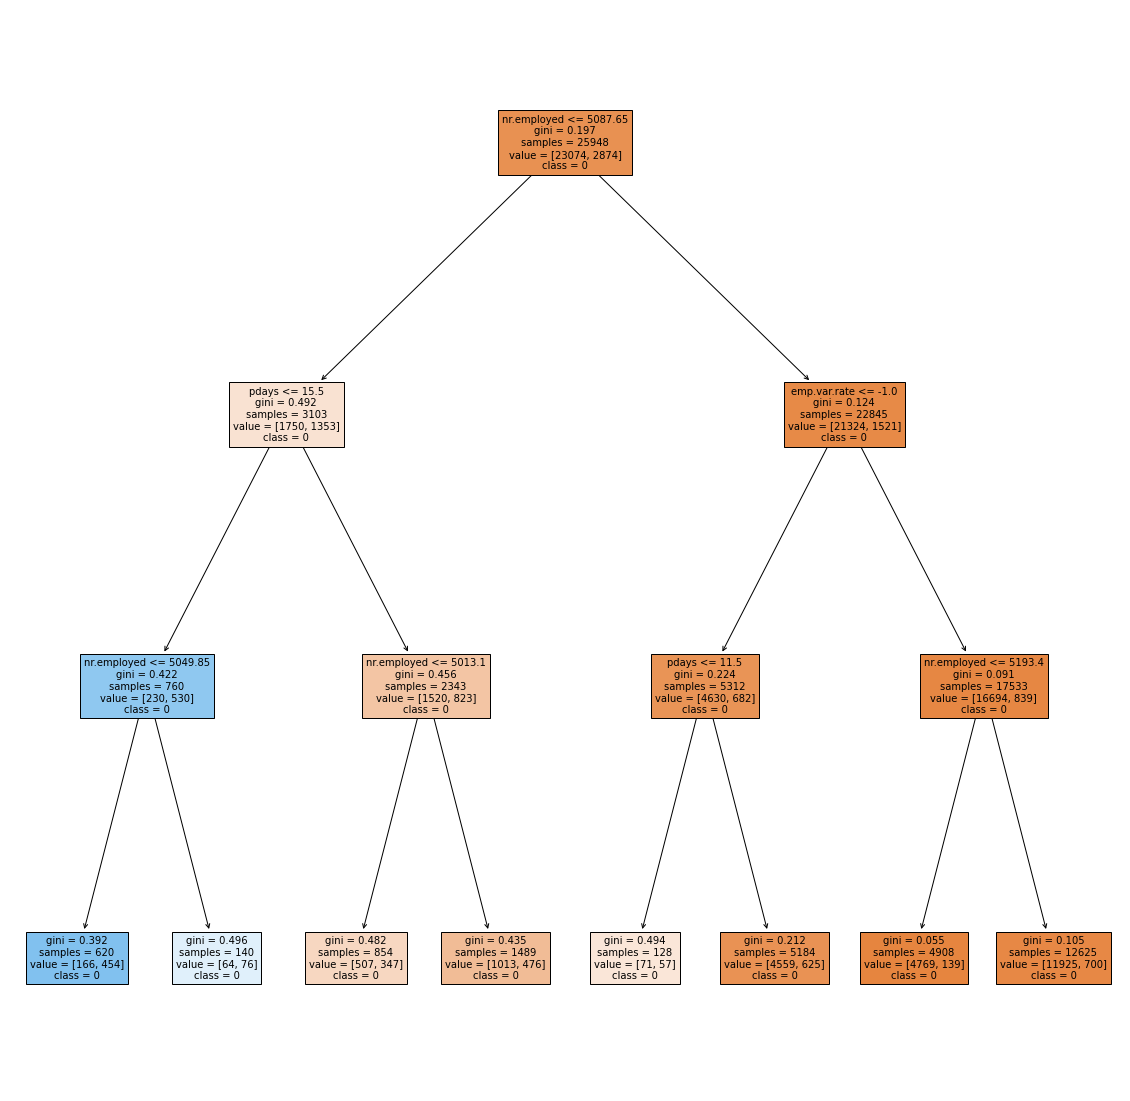

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(cam, fontsize=10, feature_names=X.columns, class_names=y.astype(str), filled=True)
plt.show()

[[9699   88]
 [1084  250]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


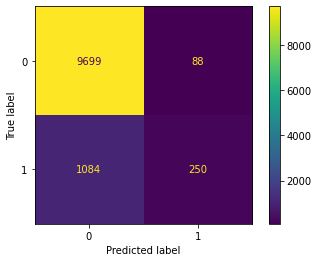

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib as plt
y_pred = cam.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
print(matrix)

plot_confusion_matrix(cam, X_test, y_test)

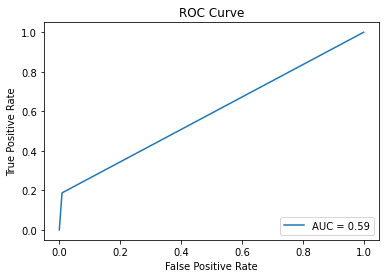

In [ ]:
# Compute the ROC curve and AUC
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt 


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Other Models 

In [ ]:
from xgboost.sklearn import XGBRegressorBase
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import VotingClassifier

In [ ]:
xg_model = XGBClassifier(random_state=42)
xg_model.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict 
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xg_model.predict(X_test)

In [ ]:
ensemble = VotingClassifier(estimators=[('rf', rf), ('xgb_model', xg_model)], voting='soft')
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)


In [ ]:
print("Accuracy of Random Forest: ", rf.score(X_test, y_test))
print("Accuracy of XGBoost: ",  xg_model.score(X_test, y_test))
print("Accuracy of Ensemble: ", ensemble.score(X_test, y_test))
print("Accuracy of SDT:", cam.score(X_test, y_test))

Accuracy of Random Forest:  0.8862512363996043
Accuracy of XGBoost:  0.8935347540688787
Accuracy of Ensemble:  0.890477475047208
Accuracy of SDT: 0.894613793723586


In [ ]:
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

precision_xg = precision_score(y_test, y_pred_xgb)
recall_xg = recall_score(y_test, y_pred_xgb)

precision_en = precision_score(y_test, y_pred_ensemble)
recall_en = recall_score(y_test, y_pred_ensemble)

precision_sdt = precision_score(y_test, y_pred)
recall_sdt = recall_score(y_test, y_pred)

print("Precision_rf:", precision_rf)
print("Recall_rf:", recall_rf)

print(" ")
print("Precision_sdt:", precision_sdt)
print("Recall_sdt:", recall_sdt)
print(" ")

print("Precision_xg:", precision_xg)
print("Recall_xg:", recall_xg)
print(" ")

print("Precision_en:", precision_en)
print("Recall_en:", recall_en)

Precision_rf: 0.5564648117839607
Recall_rf: 0.25487256371814093
 
Precision_sdt: 0.7396449704142012
Recall_sdt: 0.1874062968515742
 
Precision_xg: 0.6984126984126984
Recall_xg: 0.19790104947526238
 
Precision_en: 0.6102661596958175
Recall_en: 0.24062968515742128


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


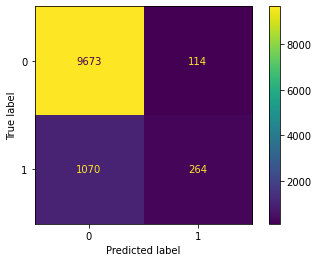

In [ ]:
matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

plot_confusion_matrix(xg_model, X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


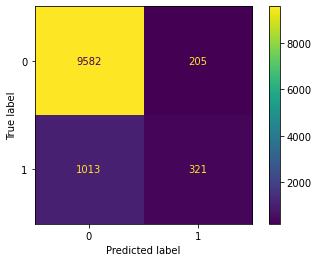

In [ ]:
matrix_voting = confusion_matrix(y_test, y_pred_ensemble)
plot_confusion_matrix(ensemble, X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


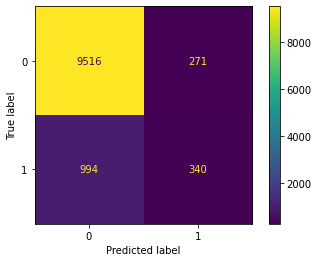

In [ ]:
matrix_random_forest = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(rf, X_test, y_test)

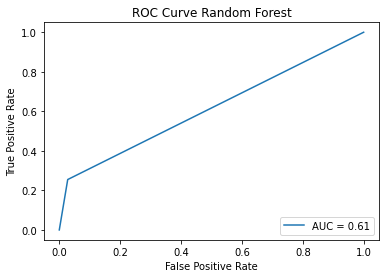

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.title('ROC Curve Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


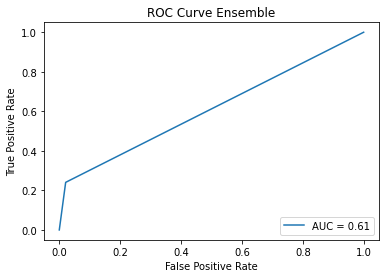

In [ ]:
fpr_en, tpr_en, thresholds = roc_curve(y_test, y_pred_ensemble)
roc_auc = auc(fpr_en, tpr_en)

plt.plot(fpr_en, tpr_en, label='AUC = %0.2f' % roc_auc)
plt.title('ROC Curve Ensemble')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

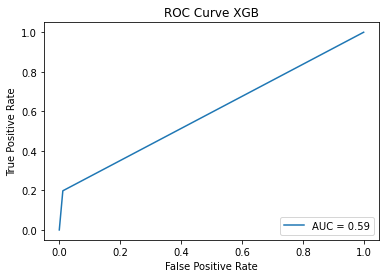

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.title('ROC Curve XGB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Pre-processing the Holdout


In [ ]:
import pickle 
import csv

In [ ]:
print(campaign_holdout.shape)

(4119, 19)


In [ ]:
campaign_holdout['Pdays'] = campaign_holdout['pdays'].astype('category')
features_n = ['nr.employed', 'emp.var.rate', 'pdays', 'previous', 'age', 'campaign']

X_holdout = pd.get_dummies(campaign_holdout[features_n], drop_first=True)
X_holdout.columns


Index(['nr.employed', 'emp.var.rate', 'pdays', 'previous', 'age', 'campaign'], dtype='object')

In [ ]:
X.columns

Index(['nr.employed', 'emp.var.rate', 'age', 'campaign', 'Pdays_1', 'Pdays_2',
       'Pdays_3', 'Pdays_4', 'Pdays_5', 'Pdays_6', 'Pdays_7', 'Pdays_8',
       'Pdays_9', 'Pdays_10', 'Pdays_11', 'Pdays_12', 'Pdays_13', 'Pdays_14',
       'Pdays_15', 'Pdays_16', 'Pdays_17', 'Pdays_18', 'Pdays_19', 'Pdays_20',
       'Pdays_21', 'Pdays_22', 'Pdays_25', 'Pdays_26', 'Pdays_27',
       'Pdays_999'],
      dtype='object')

In [ ]:
dump_model = pickle.dumps(rf)

In [ ]:
holdout_model = pickle.loads(dump_model)

In [ ]:
y_pred_holdout = holdout_model.predict(X_holdout)

In [ ]:
print(y_pred_holdout)

[0 0 1 ... 0 1 0]


In [ ]:
df_y = pd.DataFrame({'predictions': y_pred_holdout})
df_y.to_csv('team2-module-2-predictions.csv')